# DOND Data!

In [8]:
import pandas as pd
dond = pd.read_csv('dond_data.txt', sep="\t")
dond

,ID Number,Broadcast Date,Name,Education,Gender,Age,Stop Round,Amount Won,ROUND,Deal / No Deal,Bank Offer
0,NL1.001,22/12/02,Hans,L,M,45,7,"189,000",1,ND,"29,000"
1,NL1.001,22/12/02,Hans,L,M,45,7,"189,000",2,ND,"47,000"
2,NL1.001,22/12/02,Hans,L,M,45,7,"189,000",3,ND,"99,000"
3,NL1.001,22/12/02,Hans,L,M,45,7,"189,000",4,ND,"349,000"
4,NL1.001,22/12/02,Hans,L,M,45,7,"189,000",5,ND,"163,000"
...,...,...,...,...,...,...,...,...,...,...,...
662,USX.006,-,Casey,H,F,32,7,"196,000",3,ND,"88,000"
663,USX.006,-,Casey,H,F,32,7,"196,000",4,ND,"175,000"
664,USX.006,-,Casey,H,F,32,7,"196,000",5,ND,"79,000"
665,USX.006,-,Casey,H,F,32,7,"196,000",6,ND,"144,000"


Convert amount won/bank offer to numeric

In [9]:
dond = dond.replace(',','', regex=True)
dond['Amount Won'] = pd.to_numeric(dond['Amount Won'])
dond['Bank Offer'] = pd.to_numeric(dond['Bank Offer'])

New table with only deals:

In [10]:
dond.rename(columns=dond.iloc[0])
dond = dond[dond['Deal / No Deal'] != 'ND']
dond

,ID Number,Broadcast Date,Name,Education,Gender,Age,Stop Round,Amount Won,ROUND,Deal / No Deal,Bank Offer
6,NL1.001,22/12/02,Hans,L,M,45,7,189000,7,D,189000
10,NL1.002,29/12/02,Rinus,H,M,57,4,151000,4,D,151000
13,NL1.003,05/01/03,Jack,H,M,53,3,173000,3,D,173000
19,NL1.004,12/01/03,Ronald,H,M,42,6,61500,6,D,61500
22,NL1.005,26/01/03,Wim,L,M,41,3,244000,3,D,244000
...,...,...,...,...,...,...,...,...,...,...,...
633,USX.002,01/03/06,Cindy,L,F,50,7,407000,7,D,407000
642,USX.003,01/03/06,Sherman,H,M,35,9,250000,9,D,250000
650,USX.004,02/03/06,Becky,L,F,28,8,85000,8,D,85000
659,USX.005,03/03/06,Joe,H,M,49,9,5000,9,D,5000


Gender compositions of H / L education

<AxesSubplot:xlabel='Education'>

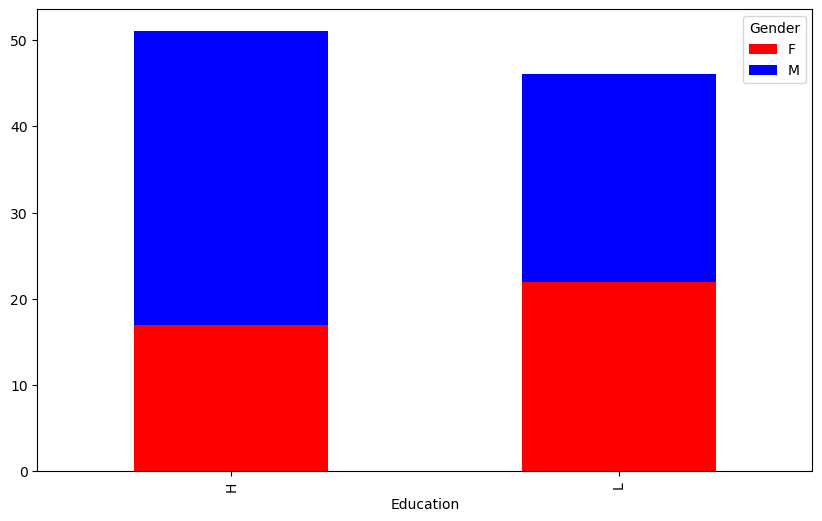

In [11]:
myColors = ['r', 'b']
dond.groupby('Education')['Gender'].value_counts().unstack().plot(kind = 'bar', stacked = True, figsize = (10,6), color = myColors)

Counts for age and gender:

In [12]:
dond['Gender'].value_counts()

M    58
F    39
Name: Gender, dtype: int64

In [13]:
dond['Education'].value_counts()

H    51
L    46
Name: Education, dtype: int64

Some stats on age:

<AxesSubplot:>

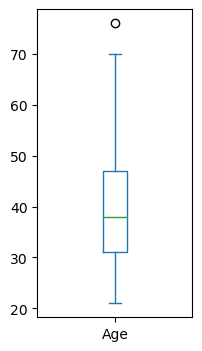

In [14]:
dond['Age'].plot(kind = 'box', figsize = (2,4))

<AxesSubplot:ylabel='Frequency'>

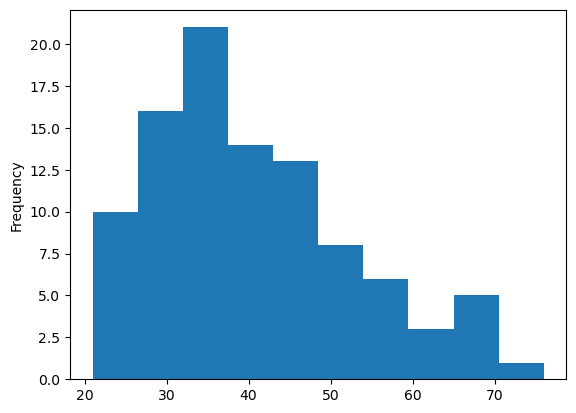

In [16]:
dond['Age'].plot(kind = 'hist')

<AxesSubplot:>

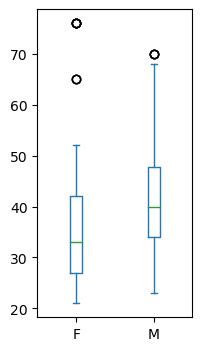

In [171]:
dond.pivot(columns = 'Gender', values = 'Age').plot(kind = 'box', figsize = (2, 4))

<AxesSubplot:>

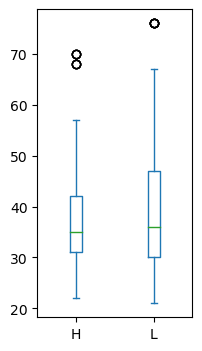

In [173]:
dond.pivot(columns = 'Education', values = 'Age').plot(kind = 'box', figsize = (2,4))

Stats for Amount Won:

In [164]:
dond['Amount Won'].describe()

count    6.670000e+02
mean     1.624713e+05
std      2.124178e+05
min      5.000000e+00
25%      2.800000e+04
50%      9.800000e+04
75%      2.015000e+05
max      1.495000e+06
Name: Amount Won, dtype: float64

<AxesSubplot:>

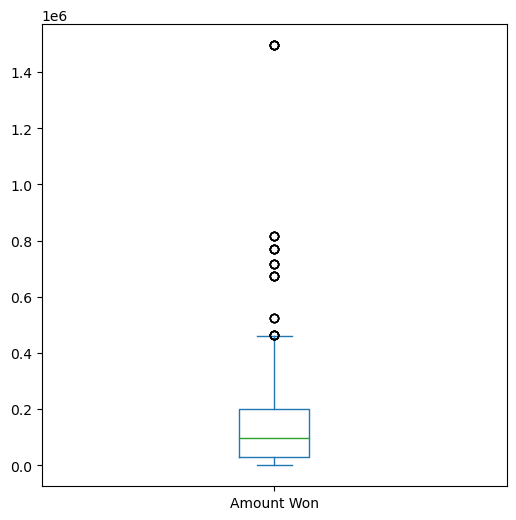

In [165]:
dond['Amount Won'].plot(kind = 'box', figsize = (6,6)) 

<AxesSubplot:ylabel='Frequency'>

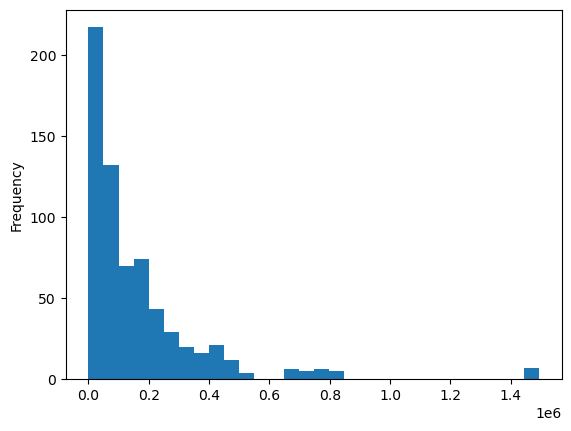

In [143]:
dond['Amount Won'].plot(kind = 'hist', bins=30) 

Gender and education comparisons of winnings

<AxesSubplot:>

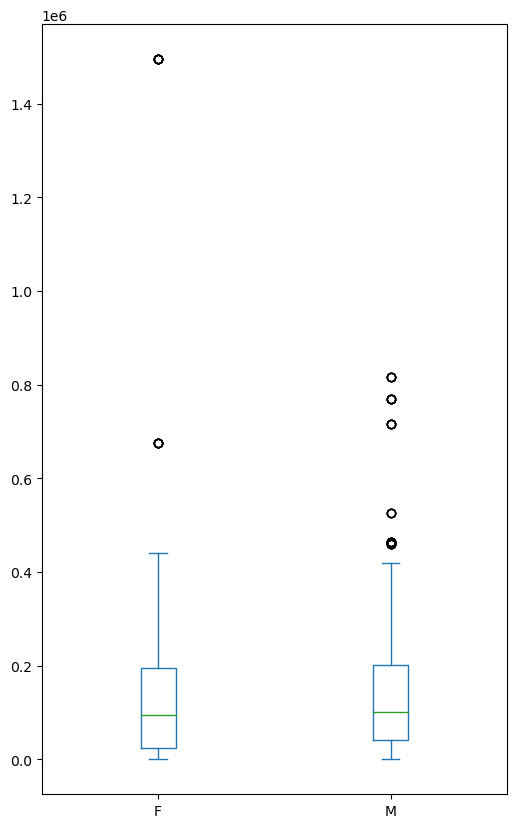

In [188]:
dond.pivot(columns = 'Gender', values = 'Amount Won').plot(kind = 'box', figsize = (6, 10))

<AxesSubplot:>

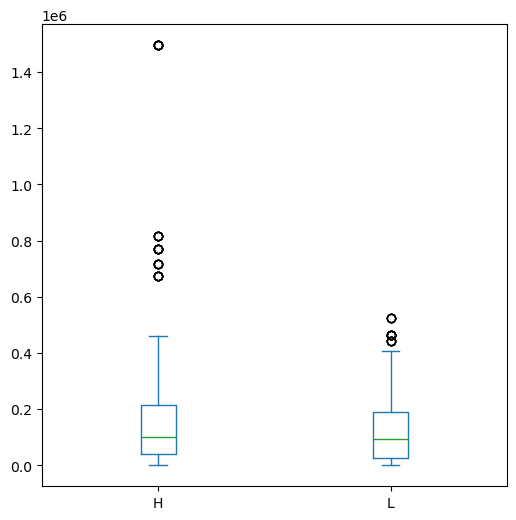

In [157]:
dond.pivot(columns = 'Education', values = 'Amount Won').plot(kind = 'box', figsize = (6, 6))

In [176]:
dond.groupby('Education')[['Amount Won']].agg(['mean','median','min','max'])

Amount Won                      
                    mean   median min      max
Education                                     
H          196485.659026  99000.0   5  1495000
L          125141.075472  94000.0   8   525000

Some scatterplots

In [163]:
dond.groupby('Gender')[['Amount Won']].agg(['mean','median','min','max'])

Amount Won                       
                 mean    median min      max
Gender                                      
F       158730.147541   94000.0   5  1495000
M       165623.375691  100000.0   8   816000

<AxesSubplot:xlabel='Stop Round', ylabel='Amount Won'>

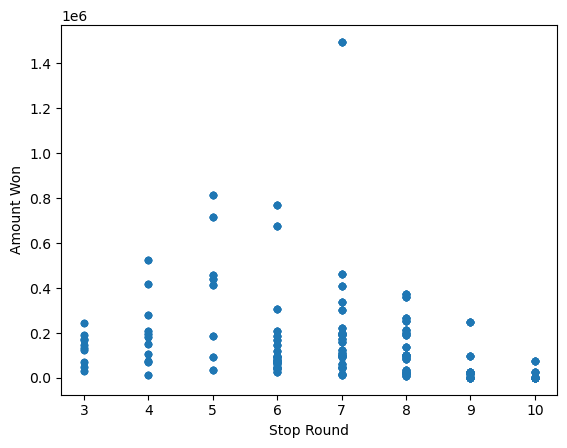

In [160]:
dond.plot(kind = 'scatter', x='Stop Round', y = 'Amount Won')

<AxesSubplot:xlabel='Age', ylabel='Amount Won'>

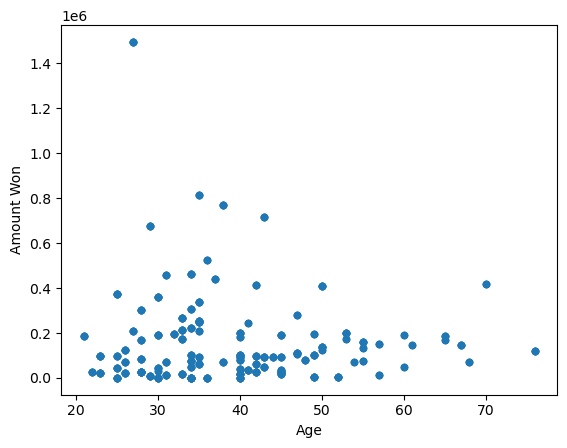

In [161]:
dond.plot(kind = 'scatter', x='Age', y = 'Amount Won')